In [149]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [140]:
url = 'https://www.fs-unep-centre.org/global-trends-in-renewable-energy-investment-2020/'
r = requests.get(url)

In [141]:
soup = BeautifulSoup(r.text)

columns = []
data = []
index = range(2004, 2020)

datasets = soup.findAll(class_='fusion-chart-dataset')
for ds in datasets:
    columns.append(ds['data-label'])
    data.append(ds['data-values'].split('|'))
    
data = np.transpose(data)

In [167]:
df = pd.DataFrame(columns=columns, index=index, data=data)
df = df.loc[:,~df.columns.duplicated()]
df = df.replace('', '0.0')
df = df.astype(float)
df

,Government R&D,Corporate R&D,Venture capital,Private equity expansion capital,Public markets,Asset finance,Asset Finance minus Re-invested equity,Small distributed capacity,Private equity buy-outs,Public markets investor exits,Corporate M&A,Project acquisition & refinancing,Total: M&A/ buy-outs etc.
2004,1.9,1.9,0.4,0.3,0.3,32.1,32.0,8.0,0.8,0.4,2.2,5.1,8.5
2005,2.0,1.9,0.6,1.0,3.6,50.0,49.8,10.1,3.7,2.3,7.6,12.5,26.2
2006,2.2,2.2,1.2,2.9,8.9,79.2,77.0,9.0,1.8,2.6,10.3,18.7,33.4
2007,2.7,2.3,2.1,3.5,19.7,106.3,103.2,13.9,3.3,3.9,19.8,29.9,56.9
2008,2.8,3.3,3.3,6.7,10.5,133.5,129.1,22.2,5.1,0.9,16.5,35.8,58.3
2009,5.4,3.3,1.6,3.0,11.7,111.8,108.1,34.7,1.9,2.4,22.4,34.9,61.5
2010,4.9,3.8,2.6,5.3,10.6,152.2,150.4,60.9,1.9,4.8,18.7,32.0,57.3
2011,4.8,4.3,2.6,2.4,9.9,189.6,187.5,75.1,2.9,0.2,29.6,42.3,75.0
2012,4.7,4.1,2.4,1.6,3.8,170.1,167.2,69.9,3.0,0.4,9.3,53.0,65.7
2013,5.2,4.0,0.8,1.3,9.8,171.5,170.3,40.2,0.5,1.7,16.2,48.7,67.0


<AxesSubplot:ylabel='Government R&D'>

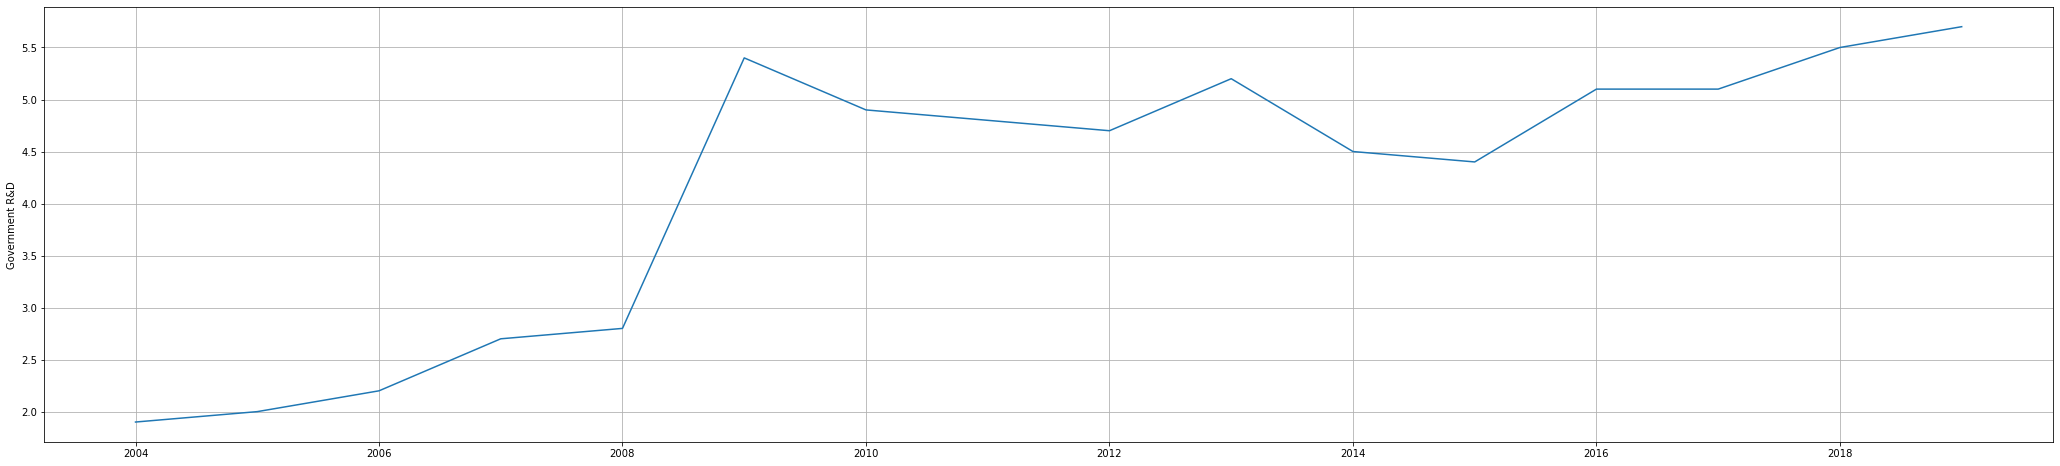

In [165]:
plt.figure(figsize=(36, 8))
plt.grid(True)
sns.lineplot(data=df, x=df.index, y='Government R&D')

In [163]:
df.to_csv('./Finance_Data/investment_trends.csv')